# **0. Table of Content**

***
# **1.**
  

In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

## 파일 옮기고 압축풀기
!mkdir -p ~/project/TIL/AI_study/dataset/the-movie
!mv the-movies-dataset.zip ~/project/TIL/AI_study/dataset/zips/the-movies.zip
!unzip ~/project/TIL/AI_study/dataset/zips/the-movies.zip -d ~/project/TIL/AI_study/dataset/the-movie

In [ ]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata
## 파일 옮기고 압축풀기
!mkdir -p ~/project/TIL/AI_study/dataset/tmdb
!mv tmdb-movie-metadata.zip ~/project/TIL/AI_study/dataset/zips/tmdb.zip
!unzip ~/project/TIL/AI_study/dataset/zips/tmdb.zip -d ~/project/TIL/AI_study/dataset/tmdb

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ROOT_PATH    = '/home/jovyan/project/TIL/AI_study'
DATASET_PATH = f'{ROOT_PATH}/dataset/tmdb'

# **1.CBF (Contents Based Filtering)**
## **(1) movies.csv**
-------
|feature|설명|
|:--:|:--:|
|budget|제작비|
|genre|장르|
|homepage|공식 홈페이지|
|id|고유 식별 번호|
|keywords|키워드|
|original_language|개봉 언어|
|original_title|개봉 제목|
|overview|간단한 설명|
|popularity|총 관객수|
|production_companies|제작사|
|production_countries|제작국가|
|release_date|개봉일|
|revenue|총 수익|
|runtime|시간|
|status|개봉했는지 여부|
|tagline|캐치 프라이즈|
|title|제목|
|vote_average|평균 레이팅|
|vote_count|레이팅 수|

## **(2) credits.csv**
-------
|feature|설명|
|:--:|:--:|
|movie_id|고유 식별번호|
|cast|섭외 배우|
|crew|제작진|


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [4]:
credits_df = pd.read_csv(f'{DATASET_PATH}/tmdb_5000_credits.csv')
movies_df  = pd.read_csv(f'{DATASET_PATH}/tmdb_5000_movies.csv')

In [5]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits_df.columns = ['id', 'title', 'cast', 'crew']
credits_df.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
## 두 df에 있는 같은 id column의 값으로 병합함. (4803 x 23 사이즈)
movies_df = movies_df.merge(credits_df, on = 'id')
print(movies_df.shape)
movies_df.head()

(4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## **(2) 가중 레이팅 계산**
- IMDB에서 나와 있는 공식으로 Weighted Rating을 계산해보자
- $Weighted Rating (WR) = (\frac{v}{v+m})*R + (\frac{m}{v + m})*C$  

|파라미터|설명|
|:--:|:--:|
|v|투표 (레이팅) 수|
|m|가중치 레이팅 계산에 반영될 최소 투표 수|
|C|전체 평균 레이팅|
|R|각 평균 레이팅|

In [8]:
m        = movies_df['vote_count'].quantile(0.9)
C        = movies_df['vote_average'].mean()

q_movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
print(f'minimum vote for WR : {m:,.1f},\n\
average rating for whole movies in dataset : {C:.1f}\n\
and # of satisfied movies what vote_count >= {m:,.1f} : {q_movies.shape[0]} ')

minimum vote for WR : 1,838.4,
average rating for whole movies in dataset : 6.1
and # of satisfied movies what vote_count >= 1,838.4 : 481 


In [9]:
def weighted_rating(x, m=m, C=C):
    
    v, R = x['vote_count'], x['vote_average']
    return (v * R / (v + m)) + (m * C / (v + m))

In [10]:
q_movies['WR'] = q_movies.apply(weighted_rating, axis=1)
q_movies = q_movies.sort_values('WR', ascending = False)

## Weighted Rating을 기준으로 내림차순 정렬
q_movies[['title_x', 'vote_count', 'vote_average', 'WR']].head(10)

,title_x,vote_count,vote_average,WR
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


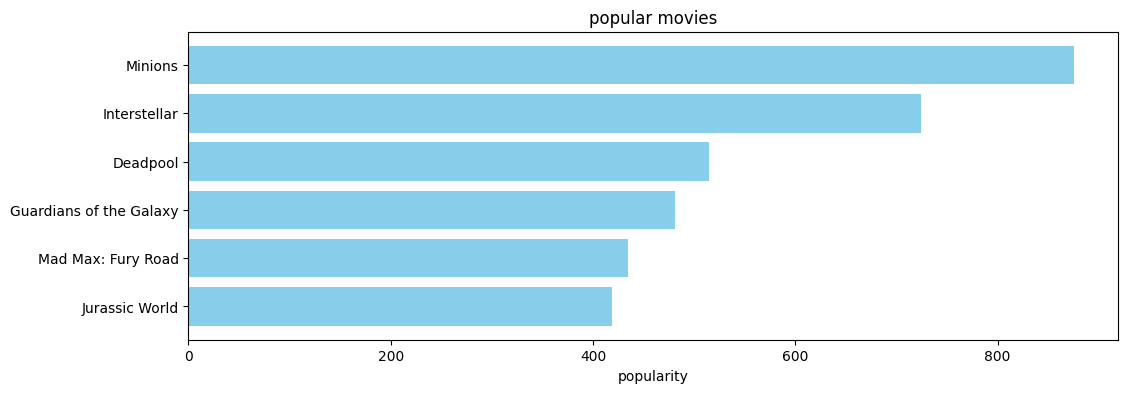

In [11]:
pop = movies_df.sort_values('popularity', ascending = False)
plt.figure(figsize=(12, 4))

plt.barh(pop['title_x'].head(6), pop['popularity'].head(6), align = 'center', color ='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('popularity')
plt.title('popular movies')

popularities = pop['popularity'].head(6).to_dict().values()
titles       = pop['title_x'].head(6).to_dict().values()
    

In [12]:
tfidf = TfidfVectorizer(stop_words = 'english')
movies_df['overview'] = movies_df['overview'].fillna('')

In [13]:
tfidf_mat = tfidf.fit_transform(movies_df['overview'])

## 약 5,000개의 데이터에 약 21,000개의 단어가 저장되어 있음.
tfidf_mat.shape

(4803, 20978)

## **유사도 계산하기**
$Cosine\;Similarity\;=\;cos(\theta)\;=\;\frac{A \cdot B}{\lVert A \rVert \lVert B \rVert}\;=\;\frac{\sum_{i=1}^{n}A_iB_i}{\sqrt{\sum_{i=1}^{n}A_i^2}\sqrt{\sum_{i=1}^{n}B_i^2}}$

In [14]:
cos_sim = linear_kernel(tfidf_mat, tfidf_mat)
indices = pd.Series(movies_df.index, index=movies_df['title_x']).drop_duplicates()

In [15]:
def get_recommender(title, cos_sim=cos_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cos_sim[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    sim_scores = sim_scores[1: 11]
    
    movie_indices = [idx[0] for idx in sim_scores]
    return movies_df['title_x'].iloc[movie_indices]

In [16]:
get_recommender('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

# **2. CF (Collaborative Filtering)**

In [17]:
from sklearn.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset, SVD

In [18]:
DATASET_PATH = f'{ROOT_PATH}/dataset/the-movie'

In [19]:
reader     = Reader()
ratings_df = pd.read_csv(f'{DATASET_PATH}/ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [20]:
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
svd  = SVD()
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 5)

{'test_rmse': array([0.8964675 , 0.89634573, 0.89779544, 0.89562175, 0.89633262]),
 'test_mae': array([0.68848513, 0.68978802, 0.69063749, 0.68960534, 0.69410591]),
 'fit_time': (3.6478512287139893,
  3.734607458114624,
  3.7342658042907715,
  3.743704319000244,
  3.722133159637451),
 'test_time': (0.723536491394043,
  0.9014177322387695,
  0.7030601501464844,
  0.9025871753692627,
  0.6970176696777344)}

In [21]:
train_dataset = data.build_full_trainset()
svd.fit(train_dataset)

In [22]:
ratings_df[ratings_df['userId'] == 1].head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [24]:
svd.predict(1, 1003, 3)

Prediction(uid=1, iid=1003, r_ui=3, est=2.4303153482603714, details={'was_impossible': False})

# **99. 참고자료**
## **99-1. 도서**
## **99-2. 논문, 학술지**
## **99-3. 웹 사이트**
## **99-4. 데이터셋 출처**
## **99-5. 더 알아보기**